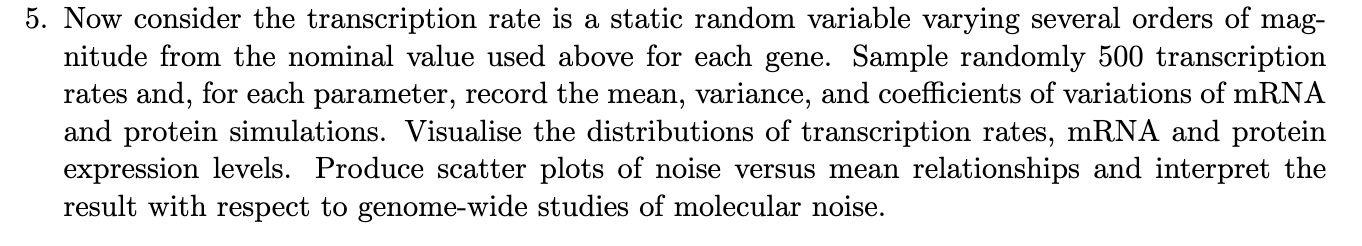


## Sample 500 transcription factors across 5 orders of magnitude


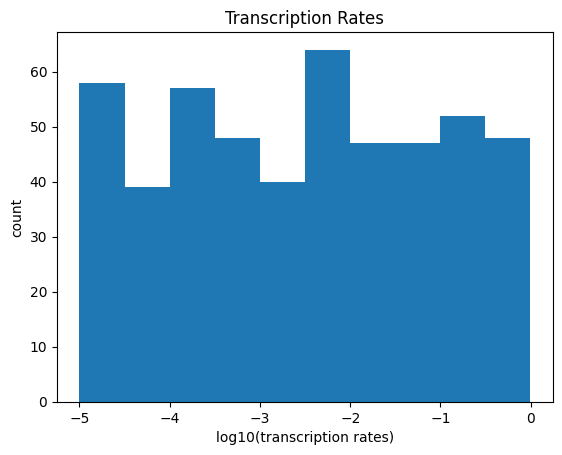

In [11]:
# sample 500 transcription rates randomly
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand

transcription_rates = np.power(10, -5 * rand(500))

# plot histogram of transcription rates in log scale (x-axis) with title Transcription Rates
plt.hist(np.log10(transcription_rates))
plt.xlabel("log10(transcription rates)")
plt.ylabel("count")
plt.title("Transcription Rates")
plt.show()

In [12]:
from ssa_ex4 import SSA_w_protein
from tqdm.notebook import tqdm

sims = []
for transcription_rate in tqdm(transcription_rates, desc="Running Simulations"):
    ssa = SSA_w_protein(
        k0_mRNA_production_rate=transcription_rate,
        k1_mRNA_degradation_rate=0.01,
        k2_protein_production_rate=5,
        k3_protein_degradation_rate=1,
    )

    sims.append(
        ssa.run_simulation(
            timesteps=1000,
            initial_mRNA_level=0,
            start_time=0.0,
            timestep_sec=1,
        )
    )

    # after each 10 simulations, append to file
    if len(sims) % 10 == 0:
        np.save("sims.npy", sims)

Running Simulations:   0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
sims[0].keys()

dict_keys(['time', 'mRNA', 'protein'])

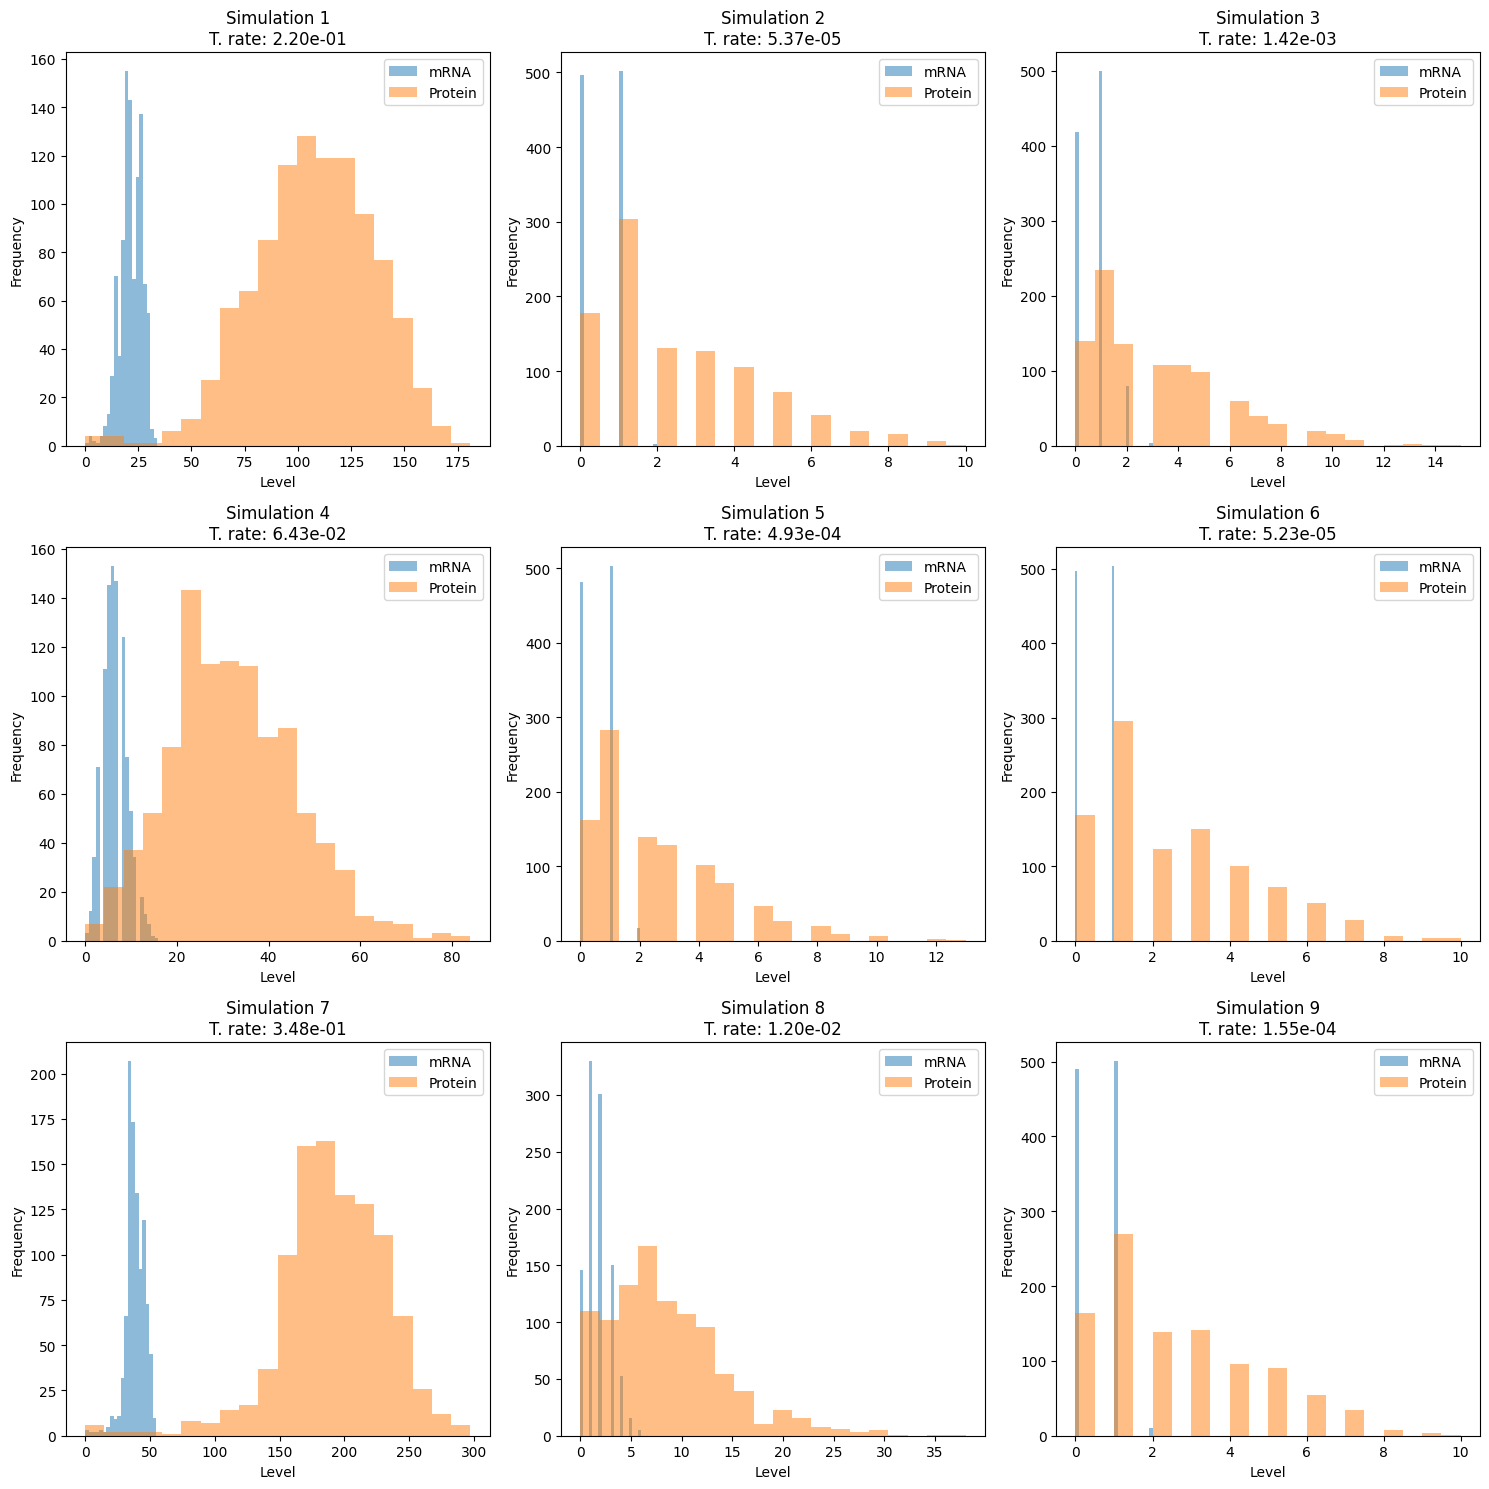

In [28]:
import random

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting each simulation in its own subplot
for i, sim in enumerate(sims[:9]):
    axes[i].hist(sim["mRNA"], bins=20, alpha=0.5, label="mRNA")
    axes[i].hist(sim["protein"], bins=20, alpha=0.5, label="Protein")
    axes[i].set_title(f"Simulation {i+1}\nT. rate: {transcription_rates[i]:.2e}")
    axes[i].set_xlabel("Level")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [30]:
# Calculating means and noises
mRNA_means = [np.mean(sim["mRNA"]) for sim in sims]
protein_means = [np.mean(sim["protein"]) for sim in sims]
mRNA_noises = [np.std(sim["mRNA"]) / np.mean(sim["mRNA"]) for sim in sims]
protein_noises = [np.std(sim["protein"]) / np.mean(sim["protein"]) for sim in sims]

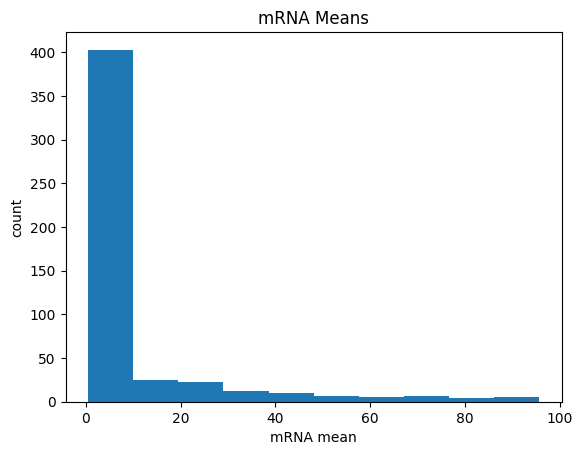

In [32]:
# plot a histogram of mRNA means
plt.hist(mRNA_means)
plt.xlabel("mRNA mean")
plt.ylabel("count")
plt.title("mRNA Means")
plt.show()

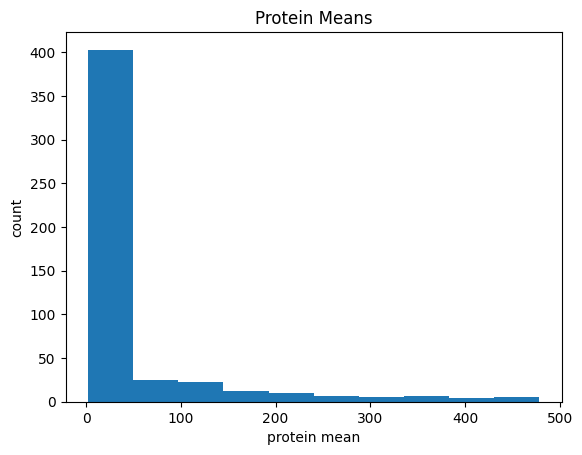

In [34]:
# plot a histogram of protein means
plt.hist(protein_means)
plt.xlabel("protein mean")
plt.ylabel("count")
plt.title("Protein Means")
plt.show()

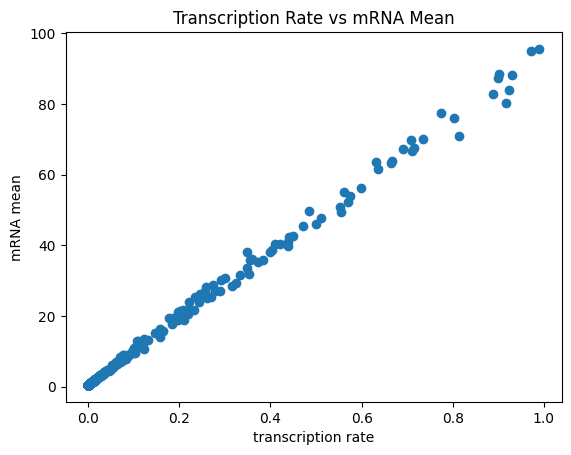

In [35]:
# plot transcription rate against mRNA mean
plt.scatter(transcription_rates, mRNA_means)
plt.xlabel("transcription rate")
plt.ylabel("mRNA mean")
plt.title("Transcription Rate vs mRNA Mean")
plt.show()

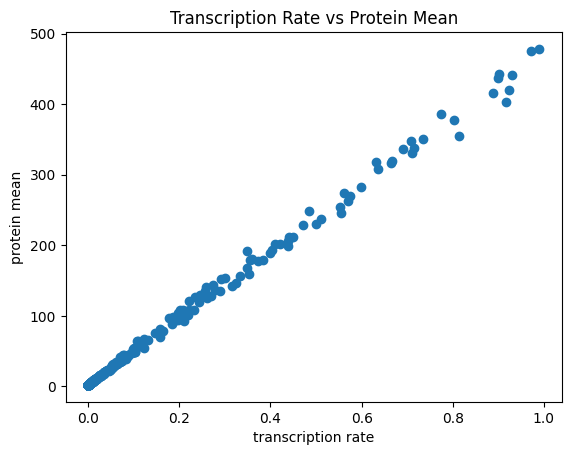

In [37]:
# plot transcription rate against protein mean
plt.scatter(transcription_rates, protein_means)
plt.xlabel("transcription rate")
plt.ylabel("protein mean")
plt.title("Transcription Rate vs Protein Mean")
plt.show()

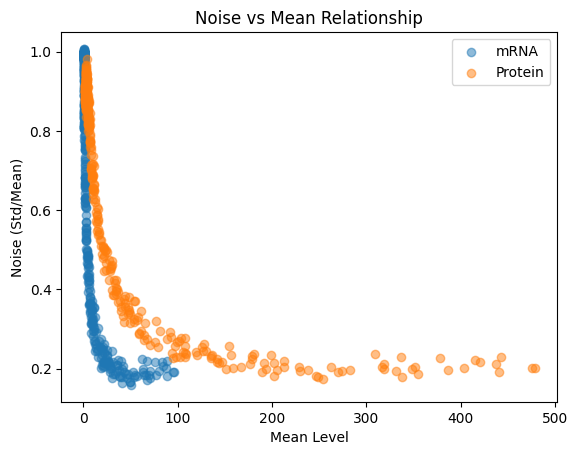

In [31]:
# Plotting scatter plots
plt.scatter(mRNA_means, mRNA_noises, alpha=0.5, label="mRNA")
plt.scatter(protein_means, protein_noises, alpha=0.5, label="Protein")
plt.title("Noise vs Mean Relationship")
plt.xlabel("Mean Level")
plt.ylabel("Noise (Std/Mean)")
plt.legend()
plt.show()